In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size':18}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams["font.family"] = 'sans-serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import math
import numpy as np
import itertools
import random

In [2]:
def sample_from_process(p, q, start, size=None):
    order = [p, q] if start % 2 else [q, p]
    if len(size) == 1:
        t = size[0]
        p_list = order * (t // 2)
        if t % 2:
            p_list.append(order[0])
        return np.random.binomial(n=1, p=p_list)
    else:
        t = size[1]
        p_list = order * (t // 2)
        if t % 2:
            p_list.append(order[0])
        return np.random.binomial(n=1, p=np.ones(size) * p_list)
    
def train(data):
    # create bigram model
    bigrams = {0: {0: 0, 1: 0}, 
               1: {0: 0, 1: 0}}
    for i in range(len(data)-1):
        u, v = data[i], data[i+1]
        bigrams[u][v] += 1
    for u in bigrams:
        if 0 in bigrams[u].values():
            bigrams[u] = dict([(v, bigrams[u][v]+1) for v in bigrams[u]])
        total = sum(bigrams[u].values())
        bigrams[u] = dict([(v, bigrams[u][v]/total) for v in bigrams[u]])
    return bigrams

def predict(bigrams, data, size): 
    def next_outcome(outcome):
        # if list(bigrams[outcome].values()) == [0.5, 0.5]:
        #     return np.random.binomial(n=1, p=0.5)
        # else:
        return max(bigrams[outcome], key=bigrams[outcome].get)
    preds = []
    for _ in range(size[0]):
        prev_outcome = data[-1]
        tmp = []
        for _ in range(size[-1]):
            outcome = next_outcome(prev_outcome)
            tmp.append(outcome)
            prev_outcome = outcome
        preds.append(tmp)
    return np.array(preds)

In [428]:
p = 0.9
q = 1-p
T = 20
t_list = np.arange(1, T, 1)
reps = 500
expected_future_risks = []
std = []
probs = []
for t in t_list:
    tmp = []
    tmp1 = []
    # randomly sample a training set
    for _ in range(reps):
        # sample a t-length sequence
        past_data = sample_from_process(p, q, start=1, size=(t,))
        bigrams = train(past_data)
        tmp1.append([bigrams[0][0], bigrams[0][1], bigrams[1][0], bigrams[1][1]])

        # sample future data
        future_data = sample_from_process(p, q, start=t+1, size=(reps, T-t))

        # evaluate the hypothesis on each of the 500 replicate sequences
        preds = predict(bigrams, past_data, size=(reps, T-t))
        cumulative_losses = np.mean((future_data - preds)**2, axis=-1)

        # compute the integrated risk divided by future duration
        future_risk = np.mean(cumulative_losses)
        tmp.append(future_risk)
    
    # compute the expected integrated risk by averaging out the randomness of training data 
    expected_future_risks.append(np.mean(tmp))
    std.append(np.std(tmp))

    probs.append(np.mean(tmp1, axis=0))

bayes_risk = (1-p)*np.ones((len(t_list),))

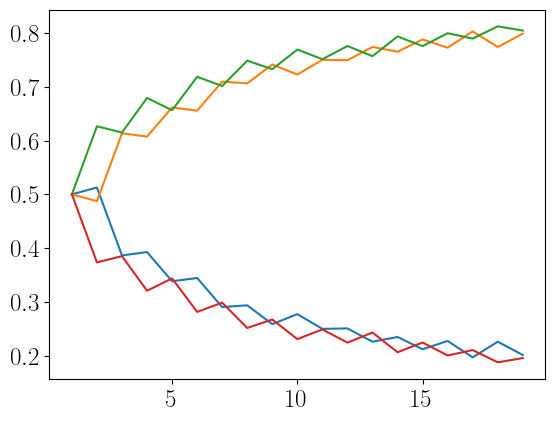

In [429]:
plt.plot(t_list, probs)
plt.show()

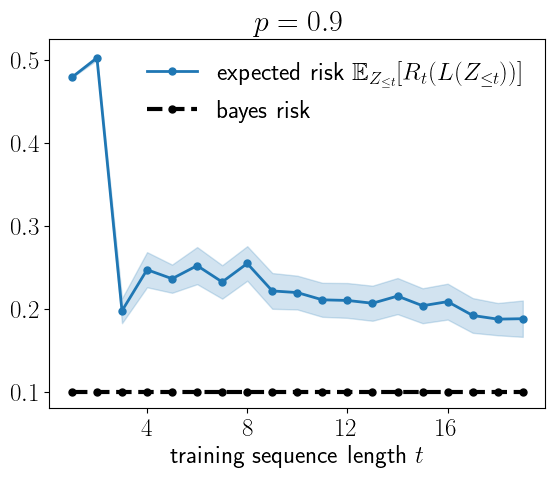

In [430]:
fig, ax = plt.subplots()
color = sns.color_palette("tab10")[0]
ax.plot(t_list, expected_future_risks, 
         label=r'expected risk $\mathbb{E}_{Z_{\leq t}}[R_t(L(Z_{\leq t}))]$', 
         color=color, marker='o', ms=5, lw=2)
ax.plot(t_list, bayes_risk, lw=3, marker='o', ls='dashed', ms=5, color='k', label='bayes risk')
ci = np.array(std) * 1.96 / np.sqrt(reps)
ax.fill_between(t_list, expected_future_risks-ci, expected_future_risks+ci, color=color, alpha=0.2)
ax.set_xlabel(r'training sequence length $t$')
ax.set_title(fr"$p = {p}$")
ax.legend(frameon=False)
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
# ax.set_ylim([0, 0.5])
plt.show()

In [283]:
data = sample_from_process(0.9, 0.1, start=1, size=(5,))

In [284]:
data

array([1, 0, 1, 0, 1])

In [285]:
bigrams = {
    0: {0: 0, 1: 0},
    1: {0: 0, 1: 0}
}

In [286]:
for i in range(len(data)-1):
    u, v = data[i], data[i+1]
    bigrams[u][v] += 1
for u in bigrams:
    bigrams[u] = dict([(v, bigrams[u][v]+1) for v in bigrams[u]])
    total = sum(bigrams[u].values())
    bigrams[u] = dict([(v, bigrams[u][v]/total) for v in bigrams[u]])

In [287]:
bigrams

{0: {0: 0.25, 1: 0.75}, 1: {0: 0.75, 1: 0.25}}

In [296]:
list(bigrams[0].values()) == [0.25, 0.75]

True

In [290]:
bigrams[0].values()

dict_values([0.25, 0.75])

Exp

In [3]:
def train(data):
    # create bigram model
    bigrams = {0: {0: 0, 1: 0}, 
               1: {0: 0, 1: 0}}
    for i in range(len(data)-1):
        u, v = data[i], data[i+1]
        bigrams[u][v] += 1
    for u in bigrams:
        if 0 in bigrams[u].values():
            bigrams[u] = dict([(v, bigrams[u][v]+1) for v in bigrams[u]])
        total = sum(bigrams[u].values())
        bigrams[u] = dict([(v, bigrams[u][v]/total) for v in bigrams[u]])
    return bigrams

In [4]:
data = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
data1 = 

In [5]:
P = train(data)

In [6]:
P 

{0: {0: 0.6, 1: 0.4}, 1: {0: 0.25, 1: 0.75}}